# Exceptions to the Buy American Act

## Overview

The following dataset was collected from the Federal Business Opportunities website, which is a searchable collection of federal contract opportunities. It includes information on contract requirements and awards. There is an additional dataset of information collected for the exceptions to the Buy American Act (BAA), signed by President Hoover in 1933. This act required the United States government to prefer purchases from American companies.

## Features

Features of the dataset include information about the funding agency, country origin, dates signed and completed, North American Industry Classification System information, product information, vendor information, and contract value information.

Exceptions to the BAA can provide interesting insight for a few reasons. How much federal money is spent outside of the United States? Are there any trends to this, in terms of which countries or industries? What agencies frequently appear on this list?

A few basic summary statistics and visualizations will tell us a little bit about the contracts.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style='darkgrid')

buy = pd.read_excel('../../_Datasets/Buy_American_Act.xls')
new_col = ['Funding_Agency', 'Funding_Agency_ID',
       'Place_Manufacture_Desc',
       'Country_Origin_Code', 'PIID', 'Date_Signed',
       'Completion_Date', 'NAICS_Code', 'NAICS_Description',
       'Prod_Service_Code', 'Prod_Service_Desc',
       'Vendor_Name', 'Vendor_City', 'Vendor_State', 'Vendor_Country',
       'DUNS_No', 'Contract_Type', 'Award_IDV_Type',
       'Total_Contract_Val',
       'Action_Obligation']
buy.columns = new_col
buy.head(5)

,Funding_Agency,Funding_Agency_ID,Place_Manufacture_Desc,Country_Origin_Code,PIID,Date_Signed,Completion_Date,NAICS_Code,NAICS_Description,Prod_Service_Code,Prod_Service_Desc,Vendor_Name,Vendor_City,Vendor_State,Vendor_Country,DUNS_No,Contract_Type,Award_IDV_Type,Total_Contract_Val,Action_Obligation
0,ADVISORY COUNCIL ON HISTORIC PRESERVATION,9530,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,JPN,INN10PD18370,2013-08-30,2014-08-31,333315.0,PHOTOGRAPHIC AND PHOTOCOPYING EQUIPMENT MANUFA...,7490,MISCELLANEOUS OFFICE MACHINES,SHARP ELECTRONICS CORPORATION,MAHWAH,NEW JERSEY,UNITED STATES,1818012,FIRM FIXED PRICE,DELIVERY ORDER,0.00,6404.00
1,ADVISORY COUNCIL ON HISTORIC PRESERVATION,9530,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,JPN,INN10PD18370,2013-09-18,2013-09-30,333315.0,PHOTOGRAPHIC AND PHOTOCOPYING EQUIPMENT MANUFA...,7490,MISCELLANEOUS OFFICE MACHINES,SHARP ELECTRONICS CORPORATION,MAHWAH,NEW JERSEY,UNITED STATES,1818012,FIRM FIXED PRICE,DELIVERY ORDER,2047.70,2047.70
2,ADVISORY COUNCIL ON HISTORIC PRESERVATION,9530,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,JPN,INN10PD18370,2015-05-20,2014-08-31,333315.0,PHOTOGRAPHIC AND PHOTOCOPYING EQUIPMENT MANUFA...,7490,MISCELLANEOUS OFFICE MACHINES,SHARP ELECTRONICS CORPORATION,MAHWAH,NEW JERSEY,UNITED STATES,1818012,FIRM FIXED PRICE,DELIVERY ORDER,2587.52,2587.52
3,ADVISORY COUNCIL ON HISTORIC PRESERVATION,9530,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,JPN,INN10PD18370,2015-06-22,2014-08-31,333315.0,PHOTOGRAPHIC AND PHOTOCOPYING EQUIPMENT MANUFA...,7490,MISCELLANEOUS OFFICE MACHINES,SHARP ELECTRONICS CORPORATION,MAHWAH,NEW JERSEY,UNITED STATES,1818012,FIRM FIXED PRICE,DELIVERY ORDER,-1630.24,-1630.24
4,AFRICAN DEVELOPMENT FOUNDATION,1141,MFG OUTSIDE U.S. - UNREASONABLE COST,JPN,TFSAADF140059,2014-09-15,2015-01-13,423110.0,AUTOMOBILE AND OTHER MOTOR VEHICLE MERCHANT WH...,2310,PASSENGER MOTOR VEHICLES,TOYOTA GIBRALTAR STOCKHOLDINGS LTD,GIBRALTAR,NaN,GIBRALTAR,565409018,FIRM FIXED PRICE,PURCHASE ORDER,35324.99,35324.99


Empty values and NaN do not seem to be a major issue when using the info() method. Vendor state has many missing values, but it is not likely critical for our questions. Without several numeric values, the describe() method won't tell much.

In [2]:
buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59535 entries, 0 to 59534
Data columns (total 20 columns):
Funding_Agency            59535 non-null object
Funding_Agency_ID         59535 non-null object
Place_Manufacture_Desc    59535 non-null object
Country_Origin_Code       59176 non-null object
PIID                      59535 non-null object
Date_Signed               59535 non-null datetime64[ns]
Completion_Date           59535 non-null datetime64[ns]
NAICS_Code                59502 non-null float64
NAICS_Description         59502 non-null object
Prod_Service_Code         59531 non-null object
Prod_Service_Desc         59531 non-null object
Vendor_Name               59526 non-null object
Vendor_City               59530 non-null object
Vendor_State              44843 non-null object
Vendor_Country            59463 non-null object
DUNS_No                   59535 non-null int64
Contract_Type             59463 non-null object
Award_IDV_Type            59535 non-null object
Total_Contr

In [20]:
for col in buy.columns:
    print("{}\n".format(str(col)), len(buy[col].unique()))

Funding_Agency
 203
Funding_Agency_ID
 201
Place_Manufacture_Desc
 5
Country_Origin_Code
 192
PIID
 47275
Date_Signed
 1667
Completion_Date
 3266
NAICS_Code
 713
NAICS_Description
 704
Prod_Service_Code
 565
Prod_Service_Desc
 571
Vendor_Name
 7132
Vendor_City
 2743
Vendor_State
 54
Vendor_Country
 105
DUNS_No
 6788
Contract_Type
 14
Award_IDV_Type
 4
Total_Contract_Val
 40740
Action_Obligation
 40901


C:\Users\seapea\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


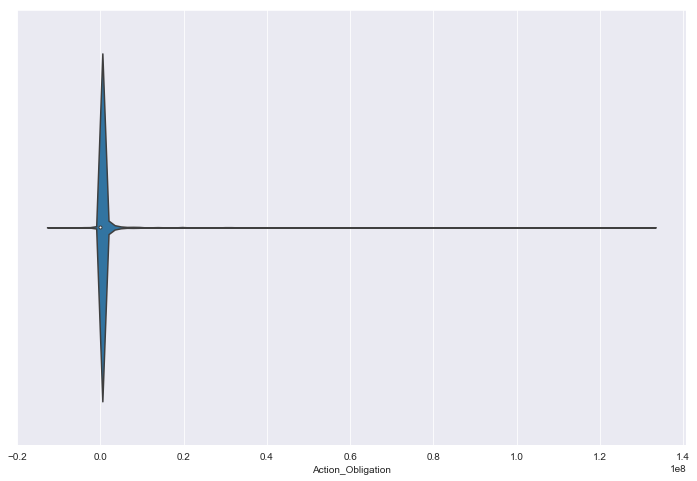

In [37]:
plt.figure(figsize=(12,8))
sns.violinplot(x=buy['Action_Obligation'])

## Notes

The violinplot is not doing a good job of telling us much. The count around zero is overwhelmingly large. A very large outlier is likely skewing the information and spreading out the values too much for insight. The describe() method trick on this column confirms this is the case.

In [29]:
buy['Action_Obligation'].describe()

count    5.953500e+04
mean     6.371874e+04
std      1.175886e+06
min     -1.255044e+07
25%      3.101250e+02
50%      4.955000e+03
75%      1.802800e+04
max      1.331093e+08
Name: Action_Obligation, dtype: float64

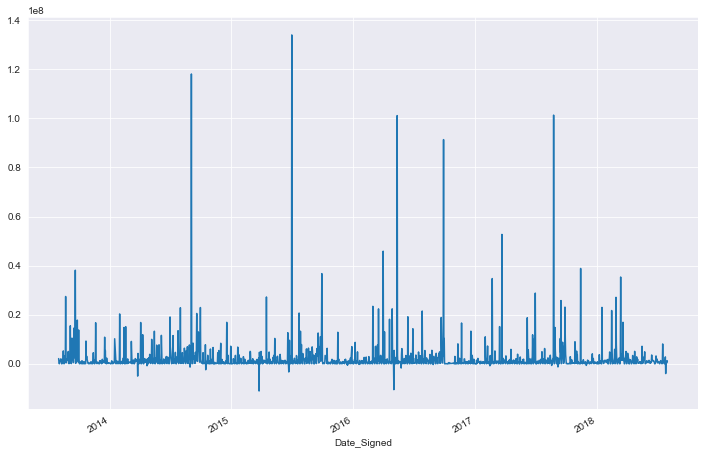

In [47]:
plt.figure(figsize=(12,8))
buy.groupby('Date_Signed')['Action_Obligation'].sum().plot()

In [43]:
(buy['Country_Origin_Code'].dropna().value_counts() / buy['Country_Origin_Code'].dropna().count()).sort_values(ascending=False)

CHN    0.117362
MEX    0.107932
CAN    0.106006
FRA    0.080252
JPN    0.058470
DEU    0.056661
GBR    0.049716
KOR    0.049226
TWN    0.033392
ZAF    0.024013
CHE    0.022763
IND    0.022627
ITA    0.014668
SGP    0.012961
MYS    0.009159
ISR    0.007723
QAT    0.007419
USA    0.007351
SWE    0.006962
NGA    0.006455
AUS    0.006422
KEN    0.006253
NLD    0.006016
THA    0.005458
GIN    0.005357
IRQ    0.005256
ARE    0.005239
HTI    0.005205
NZL    0.005154
IDN    0.005137
         ...   
ERI    0.000051
TTO    0.000051
IOT    0.000051
MWI    0.000051
SSD    0.000051
ZWE    0.000051
BRN    0.000034
WSM    0.000034
LBN    0.000034
BLR    0.000034
COM    0.000034
COD    0.000034
SHN    0.000034
ATF    0.000034
BDI    0.000034
PRY    0.000034
UZB    0.000017
IRN    0.000017
MUS    0.000017
STP    0.000017
FJI    0.000017
KIR    0.000017
XQZ    0.000017
MNP    0.000017
NIU    0.000017
SYR    0.000017
BMU    0.000017
CYP    0.000017
VAT    0.000017
FRO    0.000017
Name: Country_Origin_Cod